### OpenStreetMap Data Preprocessing

To easily wrangle and manipulate OSM data for analysis, we need to extract and convert the information from the GIS file format into dataframes. 

Info on Bangladesh shapefile information: https://download.geofabrik.de/osm-data-in-gis-formats-free.pdf

Extract roads: https://github.com/ghislainv/roads-osm

Retrieve OSM data: https://automating-gis-processes.github.io/2017/lessons/L7/retrieve-osm-data.html

Load OSM Data: https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0

Adding basemap: https://geopandas.org/gallery/plotting_basemap_background.html

Geospatial data: https://github.com/SocialDataSci/Geospatial_Data_with_Python/blob/master/Intro%20to%20Geospatial%20Data%20with%20Python.ipynb

Retrieve OSM: https://colab.research.google.com/drive/1Rpg0uFFMRB8Im3c32lO6J5-821vIt5p5#scrollTo=o0JwSSqwdfDF




In [1]:
#Mount google drive for content synchronization

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Install libraries for geospatial data wrangling and analysis

#Geopandas for wrangling
!pip install geopandas


#Contextily for basemap plotting 
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip3 install contextily==1.0rc2


     |████████████████████████████████| 931kB 6.9MB/s 
     |████████████████████████████████| 14.7MB 198kB/s 
     |████████████████████████████████| 10.4MB 29.8MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 0s (2,819 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...

In [3]:
import geopandas
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily

roads_df = geopandas.read_file('/content/drive/My Drive/Thesis/Bangladesh OSM Data/gis_osm_roads_free_1.shp')
roads_df.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,8656088,5122,residential,Park Road,None,B,0,0,F,F,"LINESTRING (90.42258 23.79758, 90.42236 23.798..."
1,8656089,5122,residential,দূতাবাস সড়ক,None,B,0,0,F,F,"LINESTRING (90.41887 23.79777, 90.42047 23.798..."
2,8656151,5122,residential,Dutabash Rd,None,B,0,0,F,F,"LINESTRING (90.41858 23.79907, 90.41943 23.799..."
3,8656152,5122,residential,Road 1,None,B,0,0,F,F,"LINESTRING (90.41932 23.79999, 90.42072 23.800..."
4,8656154,5122,residential,Road 2,None,B,0,0,F,F,"LINESTRING (90.42055 23.80096, 90.42103 23.801..."


### Explore and Plot Geo Data

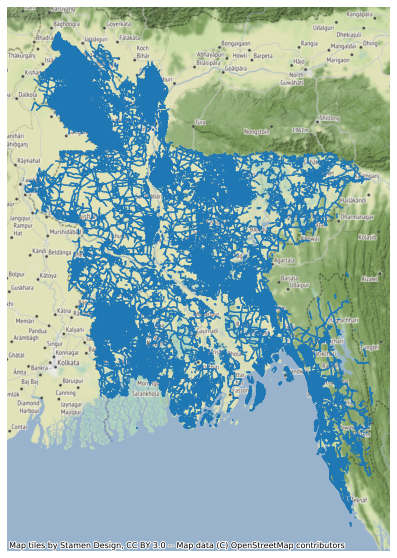

In [0]:
ax = roads_df.to_crs(epsg=3857).plot(figsize=(12,10))
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [0]:
roads_df.tail()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
322771,778028254,5122,residential,None,None,B,0,0,F,F,"LINESTRING (91.85066 22.21158, 91.85006 22.211..."
322772,778028813,5154,path,satisbabu,None,B,0,0,F,F,"LINESTRING (91.83822 22.33481, 91.83821 22.334..."
322773,778038013,5115,tertiary,None,None,B,0,0,F,F,"LINESTRING (89.85360 23.62091, 89.85364 23.620..."
322774,778038014,5115,tertiary,None,None,B,0,1,T,F,"LINESTRING (89.85337 23.62113, 89.85360 23.62091)"
322775,778079707,5122,residential,None,None,B,0,0,F,F,"LINESTRING (91.19753 23.45496, 91.19751 23.455..."


In [4]:
#Load cluster data
import pandas as pd
clusters_df = pd.read_csv('/content/drive/My Drive/Thesis/DHS_Data/bangladesh_cluster_avg_asset_2013_updated_new.csv')
clusters_df = geopandas.GeoDataFrame(clusters_df, geometry = geopandas.points_from_xy(clusters_df.longitude, clusters_df.latitude))
clusters_df.tail()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry
594,595,596,1.757480,U,24.900228,91.871489,POINT (91.87149 24.90023)
595,596,597,1.591590,U,24.904567,91.887165,POINT (91.88716 24.90457)
596,597,598,2.281590,U,24.886183,91.887103,POINT (91.88710 24.88618)
597,598,599,-0.042325,U,24.893073,91.906950,POINT (91.90695 24.89307)
598,599,600,1.242605,U,24.875934,91.895091,POINT (91.89509 24.87593)


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


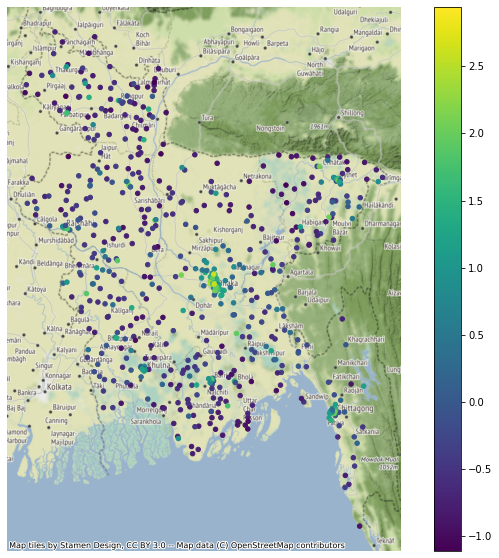

In [0]:
clusters_df.crs = {'init' :'epsg:4326'}
#clusters_dfcopy.to_crs({'init': 'epsg:3395'})

#fig, ax = plt.subplots(figsize=(12, 10))
#plt.xlim(88, 93)
#plt.ylim(20, 28)
#clusters_df = clusters_df.to_crs(epsg=3857)
ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wlthindf', legend=True, figsize=(12, 10), markersize = 20)
#roads_plot = roads_df.plot(ax = ax)
contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
plt.show()

In [0]:
bangladesh_shape = geopandas.read_file('/content/drive/My Drive/Thesis/Bangladesh Shapefile Ver 2/polbndl_bgd.shp')
bangladesh_shape.head()

,f_code,bst,use,soc,geometry
0,FA000,1,23,BGD,"LINESTRING (92.45377 20.48873, 92.42536 20.571..."
1,FA000,1,23,BGD,"LINESTRING (92.19794 21.15689, 92.20538 21.203..."
2,FA000,1,30,BGD,"LINESTRING (92.06499 21.90186, 92.08796 21.884..."
3,FA000,1,30,BGD,"LINESTRING (92.06499 21.90186, 91.97501 21.903..."
4,FA000,1,30,BGD,"LINESTRING (89.90010 22.13887, 89.91101 22.141..."


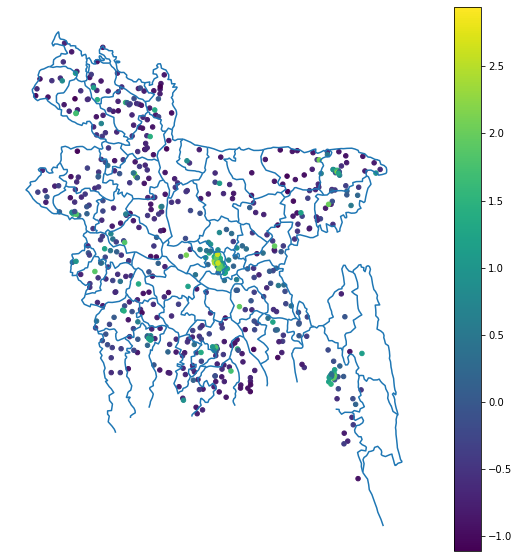

In [0]:
fig, ax = plt.subplots(figsize=(12, 10))

clusters_plot = clusters_df.plot(ax = ax, column = 'wlthindf', legend=True, figsize=(12, 10), markersize = 20)
bangladesh_plot = bangladesh_shape.plot(ax = ax)
#contextily.add_basemap(ax_clusters)
ax.set_axis_off()
plt.show()

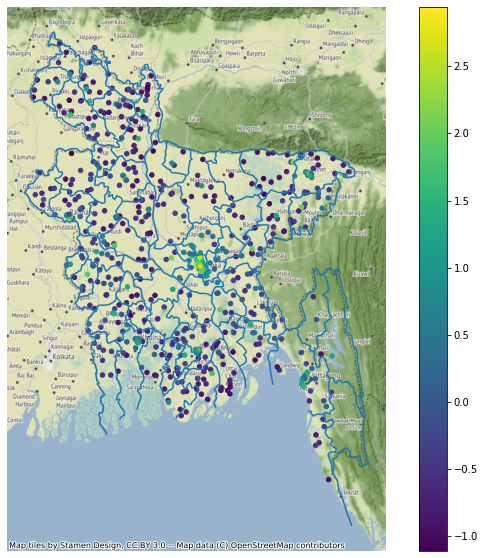

In [0]:
fig, ax = plt.subplots(figsize=(12, 10))

ax_clusters = clusters_df.to_crs(epsg=3857).plot(ax = ax, column = 'wlthindf', legend=True, figsize=(12, 10), markersize = 20)
bangladesh_plot = bangladesh_shape.to_crs(epsg=3857).plot(ax = ax)
contextily.add_basemap(ax_clusters)
ax.set_axis_off()
plt.show()

### OSM Road Data Feature Engineering 

In [5]:
#Separate Urban and Rural area clusters

clusters_rural = clusters_df[clusters_df['URBAN_RURA'] == 'R']
clusters_urban = clusters_df[clusters_df['URBAN_RURA'] == 'U']
clusters_rural.head()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry
0,0,1,-0.831240,R,21.965697,90.126312,POINT (90.12631 21.96570)
1,1,2,-0.739180,R,22.221232,90.348908,POINT (90.34891 22.22123)
2,2,3,-0.786210,R,22.191484,90.212539,POINT (90.21254 22.19148)
3,3,4,-0.447090,R,22.185481,90.167023,POINT (90.16702 22.18548)
4,4,5,-0.687435,R,22.311173,90.149822,POINT (90.14982 22.31117)


In [0]:
clusters_urban.head()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry
50,50,51,0.145555,U,22.302611,90.091872,POINT (90.09187 22.30261)
51,51,52,0.913850,U,22.053795,89.968962,POINT (89.96896 22.05380)
52,52,53,-0.261730,U,22.813022,90.191408,POINT (90.19141 22.81302)
53,53,54,-0.231740,U,22.691392,90.389866,POINT (90.38987 22.69139)
54,54,55,1.585980,U,22.691265,90.640443,POINT (90.64044 22.69127)


In [0]:
type(clusters_rural.geometry[0])

shapely.geometry.point.Point

In [9]:
#convert Rural clusters to buffers with 5km radius
clusters_rural.crs = {'init' :'epsg:4326'}
clusters_rural= clusters_rural.to_crs(epsg=3174)  
buffer_length_in_meters = (5 * 1000)

rural_buffer = clusters_rural.geometry.buffer(buffer_length_in_meters)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
len(rural_buffer)

392

In [11]:
#convert Urban clusters to buffers with 2km radius
clusters_urban.crs = {'init' :'epsg:4326'}
clusters_urban= clusters_urban.to_crs(epsg=3174)  
buffer_length = (2 * 1000)

urban_buffer = clusters_urban.geometry.buffer(buffer_length)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
len(urban_buffer)

207

In [0]:
#Convert roads_df to same crs as Urban and Rural clusters df
roads_df = roads_df.to_crs(epsg=3174)

In [0]:
no_roads_list = []
for point in rural_buffer:
  no_roads = roads_df.within(point)
  no_roads_list.append(no_roads.sum())
len(no_roads_list)

392

In [0]:
#Helper function to calculate the number of roads within a buffer zone of a cluster

def roads_within(buffer,roads_df): 
  no_roads_list = []
  for point in buffer:
    no_roads = roads_df.within(point)
    no_roads_list.append(no_roads.sum())
  return no_roads_list

In [0]:
no_roads_array = np.asarray(no_roads_list)

In [0]:
#Create column to hold total number of roads within each clusters of rural area 
clusters_rural["Total number of roads"] = no_roads_array
clusters_rural.tail()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry,Total number of roads
572,573,574,-0.877910,R,25.085715,92.199491,POINT (7884292.514 12250855.191),15
573,574,575,-0.781310,R,25.005158,92.339589,POINT (7882472.041 12267851.454),14
574,575,576,-0.563635,R,24.966018,91.933113,POINT (7911046.989 12235397.432),385
575,576,577,0.414560,R,24.911070,91.892794,POINT (7918251.663 12235316.235),1540
576,577,578,-0.589445,R,24.923085,92.414364,POINT (7884818.725 12279355.573),2


In [0]:
import os
os.chdir('/content/drive/My Drive/Thesis/OSM_data')

In [14]:
clusters_rural

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry,Total number of roads,Number of residential roads,Number of track roads,Number of living street roads,Number of trunk roads,Number of primary roads,Number of secondary roads,Number of tertiary roads,Number of service roads,Number of pedestrian roads,Number of intersection roads
0,0,1,-0.831240,R,21.965697,90.126312,POINT (inf inf),46,1,11,0,0,0,0,1,0,0,0
1,1,2,-0.739180,R,22.221232,90.348908,POINT (inf inf),413,212,7,3,0,0,0,13,0,0,0
2,2,3,-0.786210,R,22.191484,90.212539,POINT (inf inf),269,140,12,1,0,0,2,0,3,0,0
3,3,4,-0.447090,R,22.185481,90.167023,POINT (inf inf),486,235,10,11,0,0,0,3,0,0,0
4,4,5,-0.687435,R,22.311173,90.149822,POINT (inf inf),4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,574,-0.877910,R,25.085715,92.199491,POINT (inf inf),15,0,0,0,0,0,0,2,1,0,0
573,574,575,-0.781310,R,25.005158,92.339589,POINT (inf inf),14,3,0,0,0,0,0,3,0,0,0
574,575,576,-0.563635,R,24.966018,91.933113,POINT (inf inf),385,149,31,41,0,0,0,7,3,0,0
575,576,577,0.414560,R,24.911070,91.892794,POINT (inf inf),1540,1015,60,235,15,15,8,39,50,0,1


In [0]:
no_roads_urban = []
for point in urban_buffer:
  no_roads = roads_df.within(point)
  no_roads_urban.append(no_roads.sum())
len(no_roads_urban)

207

In [0]:
no_roads_urban = np.asarray(no_roads_urban)
#Create column to hold total number of roads within each clusters of rural area 
clusters_urban["Total number of roads"] = no_roads_urban
clusters_urban.tail()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry,Total number of roads
594,595,596,1.757480,U,24.900228,91.871489,POINT (7920498.952 12234150.119),526
595,596,597,1.591590,U,24.904567,91.887165,POINT (7919157.386 12235232.377),432
596,597,598,2.281590,U,24.886183,91.887103,POINT (7920737.339 12236359.585),387
597,598,599,-0.042325,U,24.893073,91.906950,POINT (7918918.634 12237643.678),269
598,599,600,1.242605,U,24.875934,91.895091,POINT (7921121.656 12237678.768),242


In [0]:
#Dump file for later integration with original dataframe
import pickle

with open('clusters_urban', 'wb') as fp:
    pickle.dump(clusters_urban, fp)

In [0]:
#Check unique types of roads in dataframe 

roads_df.fclass.unique()

array(['residential', 'trunk', 'primary', 'tertiary', 'service',
       'pedestrian', 'unclassified', 'secondary', 'trunk_link',
       'living_street', 'secondary_link', 'primary_link', 'footway',
       'path', 'track', 'unknown', 'bridleway', 'steps', 'track_grade1',
       'track_grade4', 'tertiary_link', 'cycleway', 'track_grade3',
       'track_grade5', 'track_grade2'], dtype=object)

In [0]:
#Create different dataframes for different types of roads

residential = roads_df[roads_df['fclass'] == 'residential']
track = roads_df[roads_df['fclass'] == 'track']
living_street = roads_df[roads_df['fclass'] == 'living_street']
trunk = roads_df[roads_df['fclass'] == 'trunk']
primary = roads_df[roads_df['fclass'] == 'primary']
secondary = roads_df[roads_df['fclass'] == 'secondary']
tertiary = roads_df[roads_df['fclass'] == 'tertiary']
service = roads_df[roads_df['fclass'] == 'service']
pedestrian = roads_df[roads_df['fclass'] == 'pedestrian']
intersection = roads_df[roads_df.fclass.isin(['primary_link', 'secondary_link', 'tertiary_link', 'trunk_link'])]


In [0]:
#Create list of different road types

road_types = [residential, track, living_street, trunk, primary, secondary, tertiary, service, pedestrian, intersection]

In [0]:
##Engineer the total number of roads feature for each road types and append to rural dataframe
road_types_name = ['residential', 'track', 'living street', 'trunk', 'primary', 'secondary', 'tertiary', 'service', 'pedestrian', 'intersection']
for i in range(len(road_types)):
  road_list = roads_within(rural_buffer, road_types[i])
  road_list = np.asarray(road_list)
  clusters_rural[f"Number of {road_types_name[i]} roads"] = road_list


In [0]:
#Dump file for later integration with original dataframe
import pickle

with open('clusters_rural', 'wb') as fp:
    pickle.dump(clusters_rural, fp)

In [0]:
import pickle
with open('clusters_rural', 'rb') as fp:
  clusters_rural = pickle.load(fp)

In [0]:
import pickle
with open('clusters_urban', 'rb') as fp:
  clusters_urban = pickle.load(fp)

In [0]:
##Engineer the total number of roads feature for each road types and append to urban dataframe

for i in range(len(road_types)):
  road_list = roads_within(urban_buffer, road_types[i])
  road_list = np.asarray(road_list)
  clusters_urban[f"Number of {road_types_name[i]} roads"] = road_list

In [0]:
clusters_urban.tail()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry,Total number of roads,Number of residential roads,Number of track roads,Number of living street roads,Number of trunk roads,Number of primary roads,Number of secondary roads,Number of tertiary roads,Number of service roads,Number of pedestrian roads,Number of intersection roads
594,595,596,1.757480,U,24.900228,91.871489,POINT (7920498.952 12234150.119),526,336,19,92,5,10,5,27,21,0,0
595,596,597,1.591590,U,24.904567,91.887165,POINT (7919157.386 12235232.377),432,311,19,58,6,1,0,11,17,0,1
596,597,598,2.281590,U,24.886183,91.887103,POINT (7920737.339 12236359.585),387,282,1,61,13,6,0,11,8,0,1
597,598,599,-0.042325,U,24.893073,91.906950,POINT (7918918.634 12237643.678),269,208,1,33,2,0,0,3,14,0,1
598,599,600,1.242605,U,24.875934,91.895091,POINT (7921121.656 12237678.768),242,181,2,48,4,2,0,3,0,0,0


In [0]:
#Create helper function to calculate length of roads within a cluster buffer

def road_length(buffer, roads_df):
  length_road = []
  for point in buffer:
    length = roads_df.intersection(point).length.sum()
    length_road.append(length)
  return length_road

In [0]:
#Create list of different road types
 
road_types = [roads_df, residential, track, living_street, trunk, primary, secondary, tertiary, service, pedestrian, intersection]
road_types_name = ['all', 'residential', 'track', 'living street', 'trunk', 'primary', 'secondary', 'tertiary', 'service', 'pedestrian', 'intersection']

In [0]:
##Engineer the length of roads feature for each road types and append to rural dataframe

for i in range(len(road_types)):
  print(i)
  road_list = road_length(rural_buffer, road_types[i])
  road_list = np.asarray(road_list) 
  clusters_rural[f"Length of {road_types_name[i]} roads"] = road_list

0


In [0]:
##Engineer the total number of roads feature for each road types and append to urban dataframe

for i in range(len(road_types)):
  print(f"Road type in processing: {road_types_name[i]}")
  road_length = road_length(urban_buffer, road_types[i])
  road_length = np.asarray(road_list)
  clusters_urban[f"Length of {road_types_name[i]} roads"] = road_length

In [0]:
#Create helper function to calculate distance of each cluster from nearest road types

def road_distance(buffer,roads_df):
  distance = []
  for point in buffer:
    road_distance = roads_df.distance(point).min()
    distance.append(road_distance)
  return distance

In [0]:
##Engineer the length of roads feature for each road types and append to rural dataframe

for i in range(len(road_types)):
  road_distance = road_distance(rural_buffer, road_types[i])
  road_distance = np.asarray(road_distance)
  clusters_rural[f"Distance to nearest {road_types_name[i]} road"] = road_distance

In [0]:
##Engineer the distance to the nearest roads feature for each road types and append to urban dataframe

for i in range(len(road_types)):
  road_distance = road_distance(urban_buffer, road_types[i])  
  road_distance = np.asarray(road_distance)
  clusters_urban[f"Distance to nearest {road_types_name[i]} road"] = road_distance

In [0]:
urban_buffer.head()

50    POLYGON ((8255726.377 12233816.998, 8255716.74...
51    POLYGON ((8284735.800 12237347.209, 8284726.16...
52    POLYGON ((8205633.163 12212611.699, 8205623.53...
53    POLYGON ((8203852.534 12237607.774, 8203842.90...
54    POLYGON ((8188321.635 12260042.307, 8188312.00...
dtype: geometry

In [0]:
length = residential.intersection(urban_buffer[51]).length.sum()
print(length)

41545.90859008604


In [0]:
idx = dist.idxmin()

In [0]:
closest_road = roads_df.loc[idx, 'name']
closest_road

'Polder 43/2B'

In [0]:
buildings_df = read_shapefile('/content/drive/My Drive/Thesis/Bangladesh OSM Data/gis_osm_buildings_a_free_1.shp')
buildings_df.head()

,osm_id,code,fclass,name,type,coords
0,23780888,1500,building,United Hospital,hospital,"[(90.4152343, 23.8049071), (90.4154481, 23.805..."
1,23781261,1500,building,Dr Wahab,,"[(90.4203167, 23.8073935), (90.4204331, 23.807..."
2,23852696,1500,building,"ক্যাম্পাস ২, এআইইউবি (আমেরিকান ইন্টার",,"[(90.4022763, 23.7946277), (90.4023112, 23.794..."
3,24024423,1500,building,,,"[(90.4308003, 23.8116568), (90.4313065, 23.811..."
4,24024444,1500,building,British High Comission,,"[(90.4190011, 23.7984189), (90.4198142, 23.798..."


In [0]:
buildings_df.type.unique()

array(['hospital', '', 'commercial', 'train_station', 'industrial',
       'office', 'toll_booth', 'silo', 'gasometer', 'academic',
       'university', 'residential', 'other', 'BUET Admin', 'Admin',
       'school', 'bank', 'hotel', 'dormatory', 'me workshop', 'canteen',
       'stadium', 'retail', 'hangar', 'mixed', 'apartments', 'WatchTower',
       'warehouse', 'house', 'mosque', 'public', 'VC Residence',
       'supermarket', 'cathedral', 'dormitory', 'service', 'garage',
       'garages', 'construction', 'no', 'English_Language_Cen',
       'Chayanot,_cultural_c', 'church', 'roof', 'College', 'temple',
       'Union Council', 'Orphanage', 'Community_Center', 'Official',
       'shed', 'college', 'Goverment Office', 'cabin', 'detached',
       'government', 'Semi permanent', 'Tin shet', 'PAka', 'Katcha',
       'apartment block', 'factory', 'new', 'Tin-shade', 'health_clinic',
       'kindergarten', 'under_construction', 'commercial;residenti',
       'storage_tank', 'store', 'bar

In [0]:
pois_df = read_shapefile('/content/drive/My Drive/Thesis/Bangladesh OSM Data/gis_osm_pois_a_free_1.shp')
pois_df.tail()


,osm_id,code,fclass,name,coords
13470,775702654,2205,playground,,"[(89.7525382, 22.7716773), (89.7525394, 22.771..."
13471,775889368,2205,playground,,"[(89.7728276, 22.7696018), (89.7728295, 22.769..."
13472,776423869,2205,playground,,"[(89.81432, 22.7525502), (89.8143316, 22.75256..."
13473,777217340,2205,playground,,"[(89.685262, 22.6667971), (89.6856389, 22.6672..."
13474,777513531,2205,playground,Five Star Math,"[(88.9027363, 25.7745112), (88.9032049, 25.775..."


In [0]:
pois_df.fclass.unique()


array(['park', 'school', 'hospital', 'university', 'mall', 'stadium',
       'archaeological', 'sports_centre', 'graveyard', 'restaurant',
       'museum', 'guesthouse', 'attraction', 'theme_park', 'monument',
       'golf_course', 'college', 'public_building', 'hotel',
       'supermarket', 'pitch', 'playground', 'swimming_pool', 'atm',
       'cafe', 'library', 'post_office', 'community_centre', 'bank',
       'picnic_site', 'wayside_shrine', 'zoo', 'motel', 'shelter',
       'police', 'track', 'hostel', 'town_hall', 'recycling', 'prison',
       'water_tower', 'courthouse', 'fire_station', 'artwork', 'bakery',
       'pharmacy', 'wayside_cross', 'camp_site', 'cinema', 'bookshop',
       'memorial', 'theatre', 'convenience', 'kindergarten', 'fountain',
       'stationery', 'clothes', 'fast_food', 'garden_centre',
       'doityourself', 'furniture_shop', 'car_dealership', 'ruins',
       'veterinary', 'chemist', 'hairdresser', 'mobile_phone_shop',
       'computer_shop', 'water_works'

In [0]:
landuse_df = read_shapefile('/content/drive/My Drive/Thesis/Bangladesh OSM Data/gis_osm_landuse_a_free_1.shp')
landuse_df.tail()


,osm_id,code,fclass,name,coords
71904,777955130,7205,farm,,"[(89.7534776, 22.623185), (89.7534851, 22.6232..."
71905,777955131,7205,farm,,"[(89.7538137, 22.6230693), (89.7538153, 22.623..."
71906,777955132,7205,farm,,"[(89.7541534, 22.6229883), (89.7541592, 22.623..."
71907,777955133,7205,farm,,"[(89.7544692, 22.6228713), (89.7544772, 22.622..."
71908,778069519,7205,farm,,"[(89.6854292, 25.8746953), (89.6856613, 25.874..."


In [0]:
landuse_df.fclass.unique()

array(['park', 'forest', 'commercial', 'military', 'retail', 'cemetery',
       'industrial', 'residential', 'recreation_ground', 'nature_reserve',
       'farm', 'grass', 'meadow', 'orchard', 'quarry', 'scrub',
       'allotments', 'heath', 'vineyard'], dtype=object)

In [0]:
natural_df = read_shapefile('/content/drive/My Drive/Thesis/Bangladesh OSM Data/gis_osm_natural_free_1.shp')
natural_df.tail()

,osm_id,code,fclass,name,coords
76659,7108594255,4121,tree,,"[[89.5740464, 23.6922951]]"
76660,7108594256,4121,tree,,"[[89.5745076, 23.6922912]]"
76661,7108594257,4121,tree,,"[[89.5745344, 23.6923853]]"
76662,7108594258,4121,tree,,"[[89.574552, 23.692458]]"
76663,7108594259,4121,tree,,"[[89.5745788, 23.692551]]"


In [0]:
#check out unique types of natural features
natural_df.fclass.unique()

array(['peak', 'tree', 'spring', 'beach', 'cliff'], dtype=object)

In [0]:
#Drop unimportant columns to preserve memory
drop_cols = ['name', 'ref', 'oneway', 'maxspeed', 'layer', 'bridge', 
             'tunnel']
roads_df = roads_df.drop(drop_cols, axis=1)
roads_df.head()

,Unnamed: 0,osm_id,code,fclass,coords
0,0,8656088,5122,residential,"[(90.4225779, 23.7975777), (90.4223636, 23.798..."
1,1,8656089,5122,residential,"[(90.4188686, 23.7977734), (90.4204664, 23.798..."
2,2,8656151,5122,residential,"[(90.4185824, 23.799075), (90.4194259, 23.7993..."
3,3,8656152,5122,residential,"[(90.4193159, 23.799993), (90.4207231, 23.8003..."
4,4,8656154,5122,residential,"[(90.420551, 23.8009586), (90.4210272, 23.8010..."
